In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [4]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
data.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
data.shape

(374, 13)

In [9]:
data.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [10]:
data = data.drop(columns=["Sleep Disorder"])

In [11]:
data.shape

(374, 12)

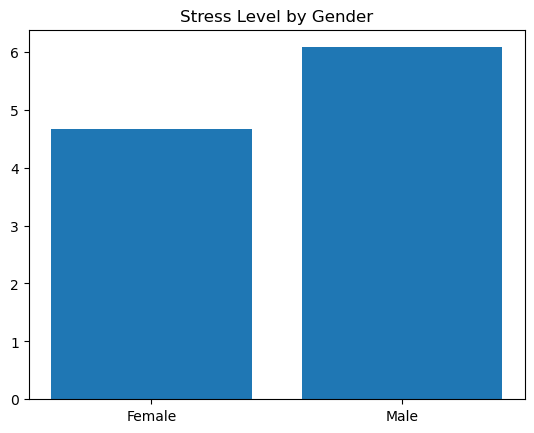

In [12]:
g = data.groupby("Gender")["Stress Level"].mean()
plt.bar(g.index, g.values)
plt.title("Stress Level by Gender")
plt.show()

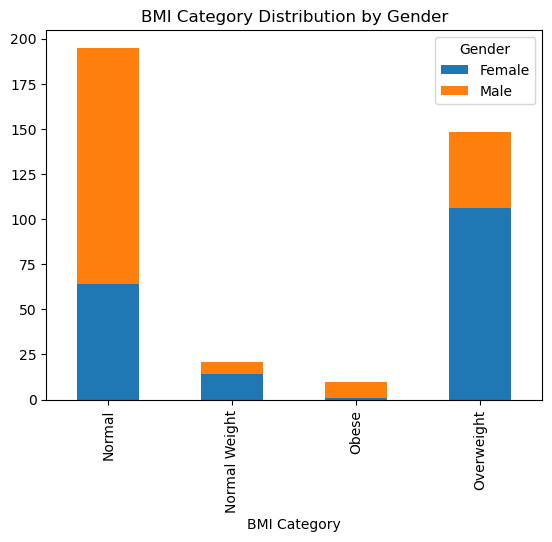

In [13]:
pd.crosstab(data["BMI Category"], data["Gender"]).plot(kind="bar", stacked=True)
plt.title("BMI Category Distribution by Gender")
plt.show()

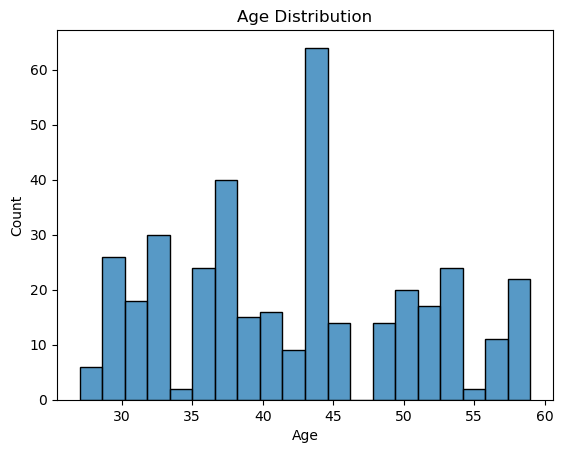

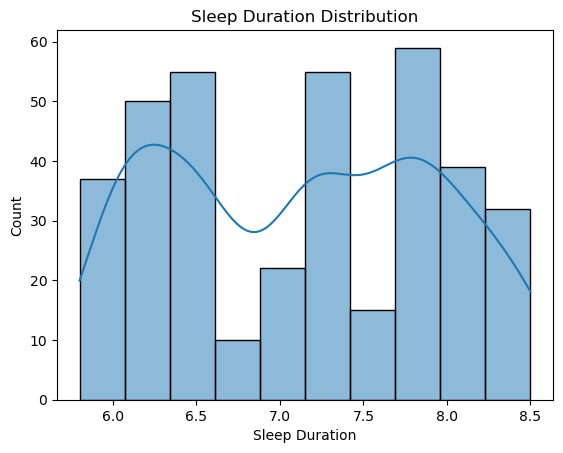

In [14]:
sns.histplot(data["Age"], bins=20)
plt.title("Age Distribution")
plt.show()

sns.histplot(data["Sleep Duration"], kde=True)
plt.title("Sleep Duration Distribution")
plt.show()

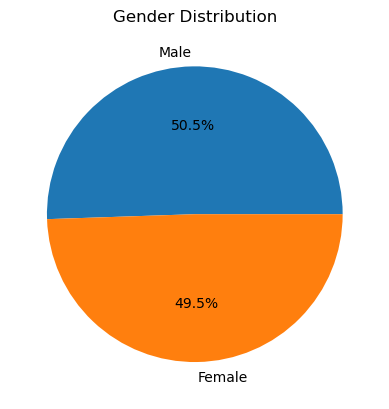

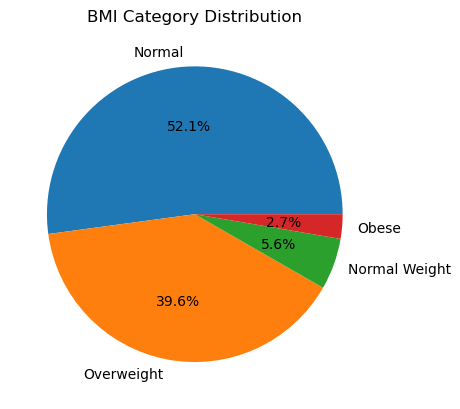

In [15]:
data["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

data["BMI Category"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("BMI Category Distribution")
plt.ylabel("")
plt.show()

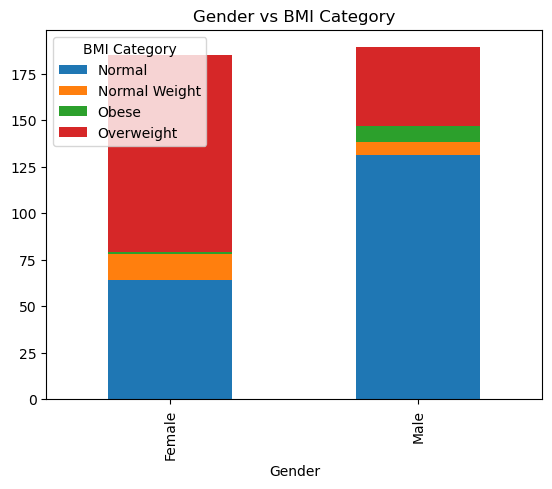

In [16]:
g_bmi = pd.crosstab(data["Gender"], data["BMI Category"])
g_bmi.plot(kind="bar", stacked=True)
plt.title("Gender vs BMI Category")
plt.show()


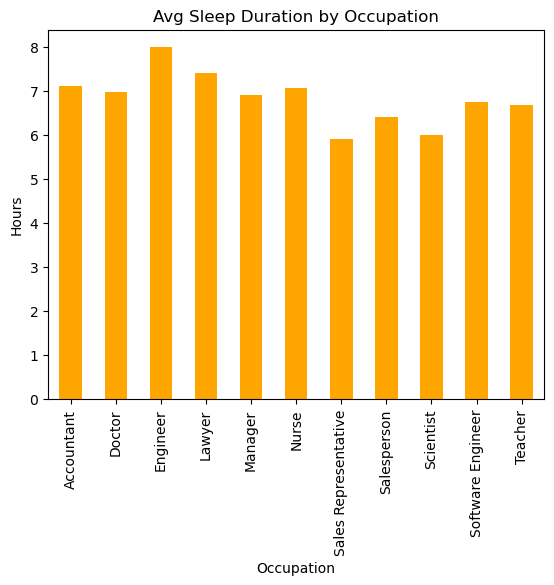

In [17]:
data.groupby("Occupation")["Sleep Duration"].mean().plot(kind="bar", color="orange")
plt.title("Avg Sleep Duration by Occupation")
plt.ylabel("Hours")
plt.show()

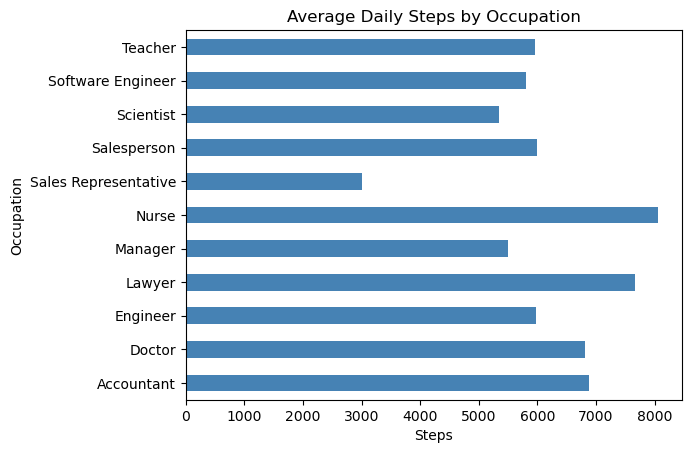

In [18]:
data.groupby("Occupation")["Daily Steps"].mean().plot(kind="barh", color="steelblue")
plt.title("Average Daily Steps by Occupation")
plt.xlabel("Steps")
plt.show()

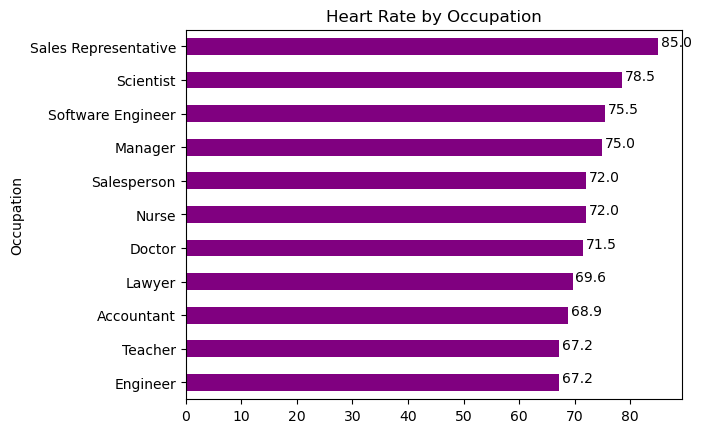

In [19]:
h = data.groupby("Occupation")["Heart Rate"].mean().sort_values()
ax = h.plot(kind="barh", color="purple")
plt.title("Heart Rate by Occupation")
for i, v in enumerate(h.values):
    ax.annotate(f"{v:.1f}", (v + 0.5, i))
plt.show()

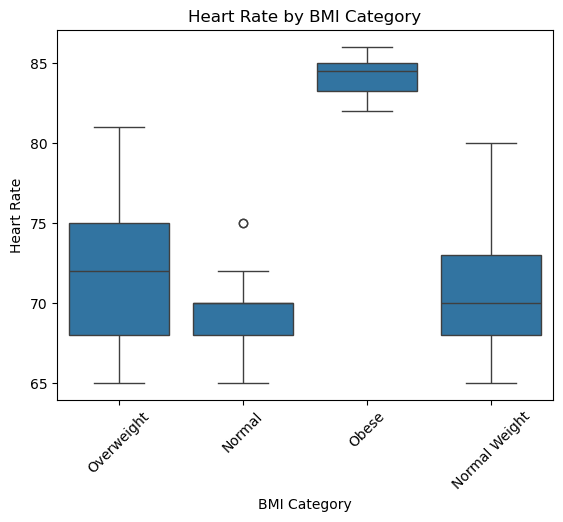

In [20]:
sns.boxplot(data=data, x="BMI Category", y="Heart Rate")
plt.title("Heart Rate by BMI Category")
plt.xticks(rotation=45)
plt.show()

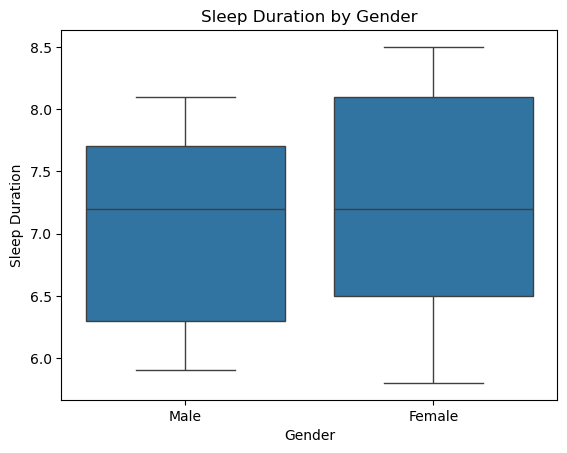

In [21]:
sns.boxplot(data=data, x="Gender", y="Sleep Duration")
plt.title("Sleep Duration by Gender")
plt.show()

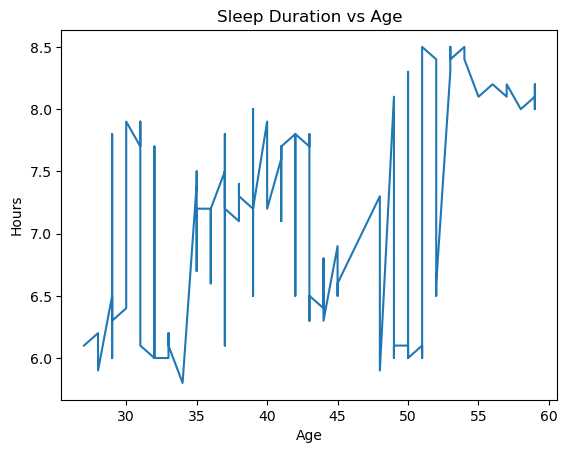

In [22]:
df_sorted = data.sort_values("Age")
plt.plot(df_sorted["Age"], df_sorted["Sleep Duration"])
plt.title("Sleep Duration vs Age")
plt.xlabel("Age")
plt.ylabel("Hours")
plt.show()

/var/folders/xn/nlz9z9sn7k92r98bkxjc8h1w0000gn/T/ipykernel_15953/978627672.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = data.groupby("Age Group")[["Sleep Duration","Stress Level","Physical Activity Level"]].mean()


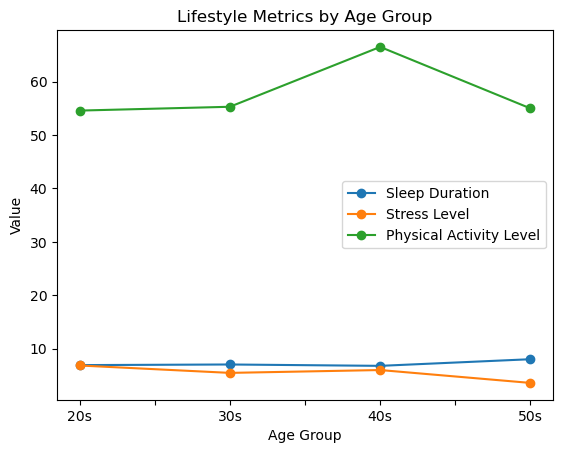

In [23]:
data["Age Group"] = pd.cut(
    data["Age"],
    bins=[0,20,30,40,50,60,120],
    labels=["<20","20s","30s","40s","50s","60+"]
)
agg = data.groupby("Age Group")[["Sleep Duration","Stress Level","Physical Activity Level"]].mean()
agg.plot(kind="line", marker="o")
plt.title("Lifestyle Metrics by Age Group")
plt.ylabel("Value")
plt.show()

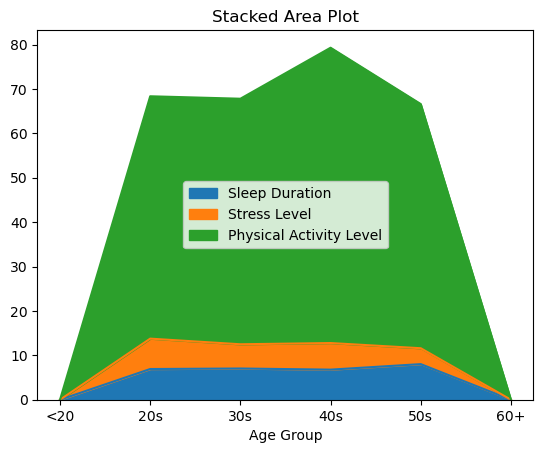

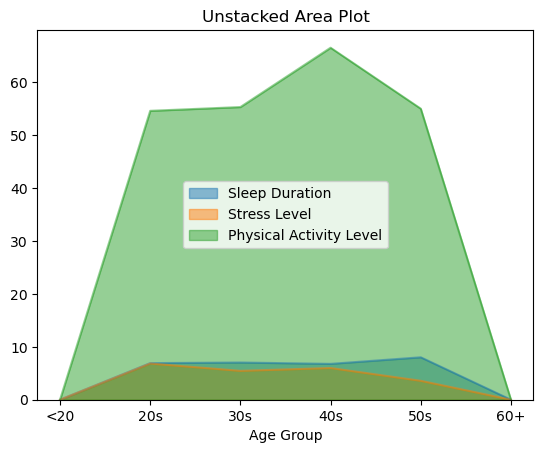

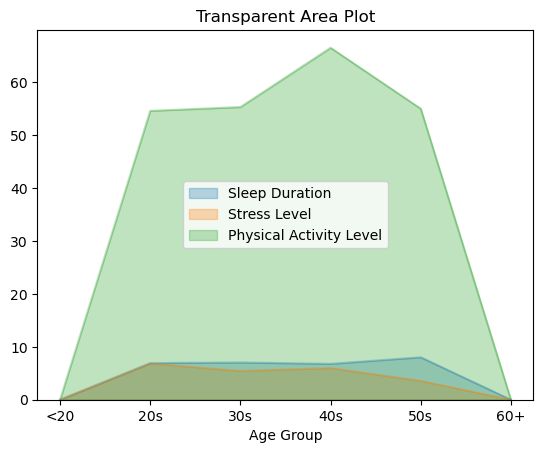

In [24]:
agg.plot(kind="area")
plt.title("Stacked Area Plot")
plt.show()

agg.plot(kind="area", stacked=False)
plt.title("Unstacked Area Plot")
plt.show()

agg.plot(kind="area", stacked=False, alpha=0.3)
plt.title("Transparent Area Plot")
plt.show()

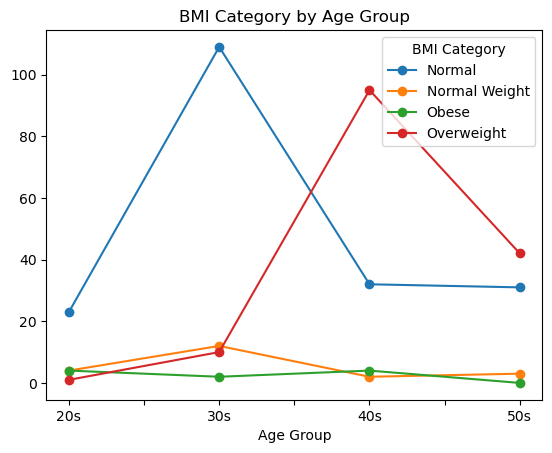

In [25]:
bmi_counts = pd.crosstab(data["Age Group"], data["BMI Category"])
bmi_counts.plot(kind="line", marker="o")
plt.title("BMI Category by Age Group")
plt.show()

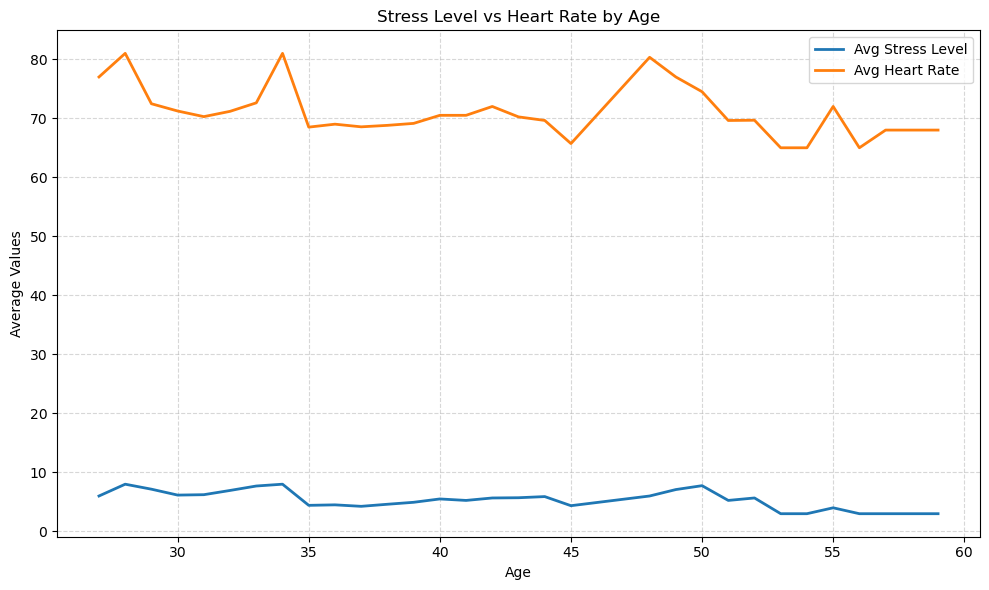

In [26]:
age_grouped3 = data.groupby("Age")[["Stress Level", "Heart Rate"]].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(age_grouped3["Age"], age_grouped3["Stress Level"], label="Avg Stress Level", linewidth=2)
plt.plot(age_grouped3["Age"], age_grouped3["Heart Rate"], label="Avg Heart Rate", linewidth=2)

plt.title("Stress Level vs Heart Rate by Age")
plt.xlabel("Age")
plt.ylabel("Average Values")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

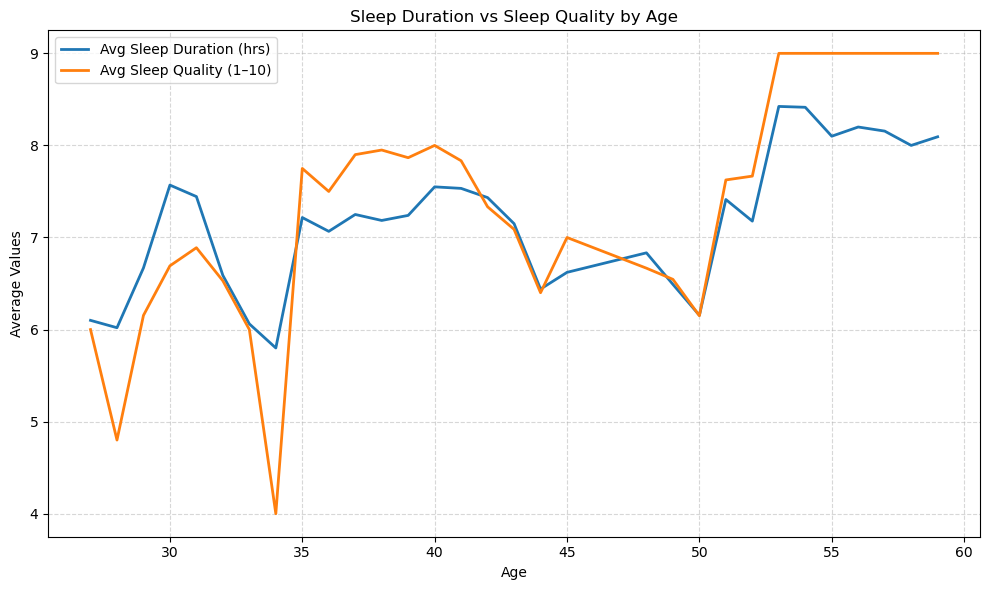

In [27]:
age_grouped = data.groupby("Age")[["Sleep Duration", "Quality of Sleep"]].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(age_grouped["Age"], age_grouped["Sleep Duration"], label="Avg Sleep Duration (hrs)", linewidth=2)
plt.plot(age_grouped["Age"], age_grouped["Quality of Sleep"], label="Avg Sleep Quality (1–10)", linewidth=2)

plt.title("Sleep Duration vs Sleep Quality by Age")
plt.xlabel("Age")
plt.ylabel("Average Values")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

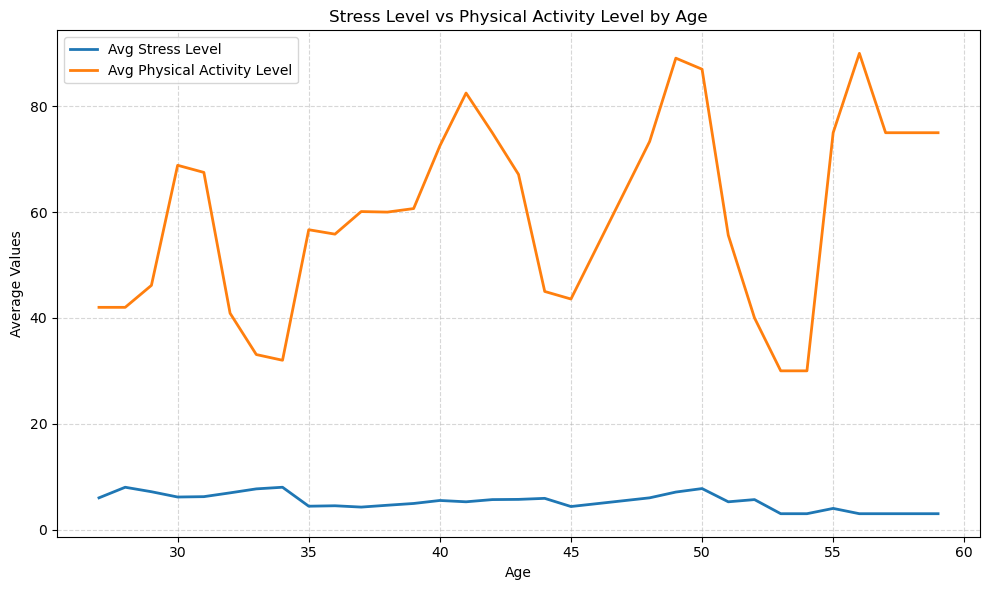

In [28]:
age_grouped2 = data.groupby("Age")[["Stress Level", "Physical Activity Level"]].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(age_grouped2["Age"], age_grouped2["Stress Level"], label="Avg Stress Level", linewidth=2)
plt.plot(age_grouped2["Age"], age_grouped2["Physical Activity Level"], label="Avg Physical Activity Level", linewidth=2)

plt.title("Stress Level vs Physical Activity Level by Age")
plt.xlabel("Age")
plt.ylabel("Average Values")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

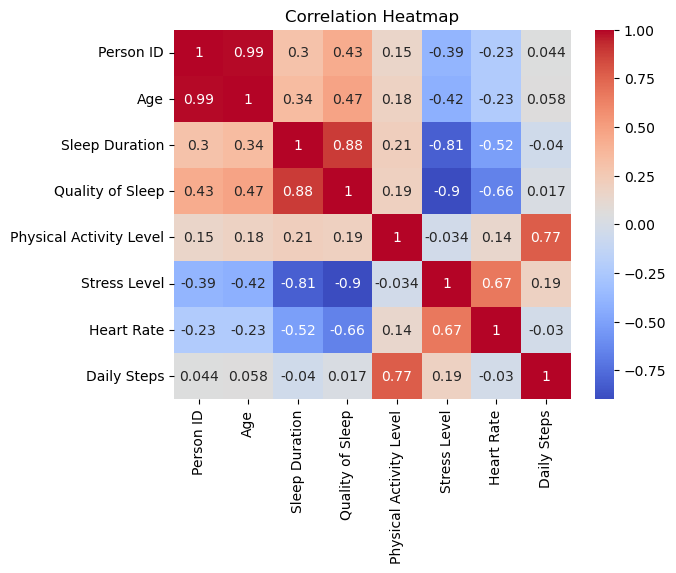

In [29]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

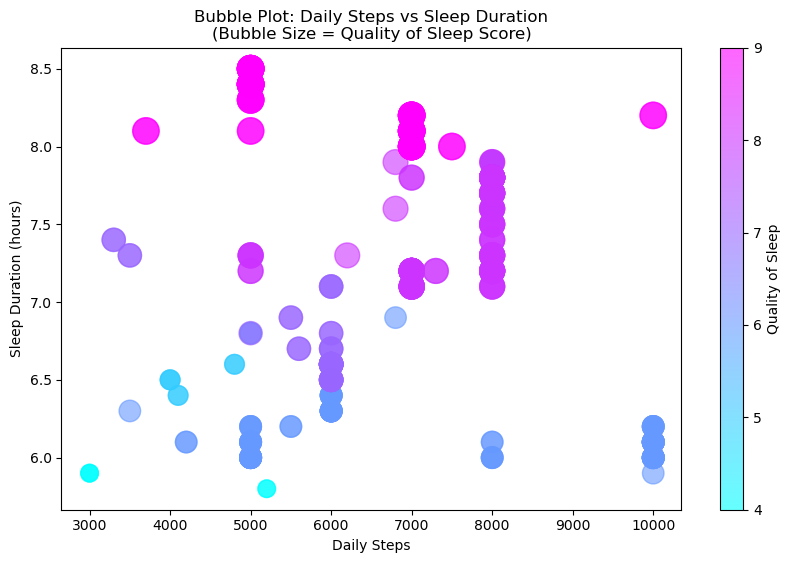

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(
    data["Daily Steps"],
    data["Sleep Duration"],
    s=data["Quality of Sleep"] * 40,
    c=data["Quality of Sleep"],
    cmap="cool",
    alpha=0.6
)

plt.title("Bubble Plot: Daily Steps vs Sleep Duration\n(Bubble Size = Quality of Sleep Score)")
plt.xlabel("Daily Steps")
plt.ylabel("Sleep Duration (hours)")
plt.colorbar(label="Quality of Sleep")
plt.show()


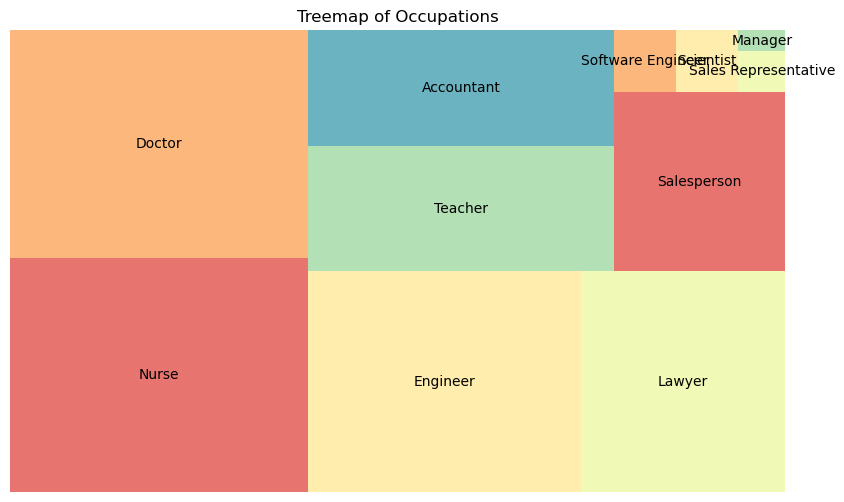

In [36]:
import squarify

counts = data["Occupation"].value_counts()

plt.figure(figsize=(10,6))
squarify.plot(sizes=counts.values, label=counts.index, alpha=0.8, color=sns.color_palette("Spectral"))
plt.title("Treemap of Occupations")
plt.axis("off")
plt.show()

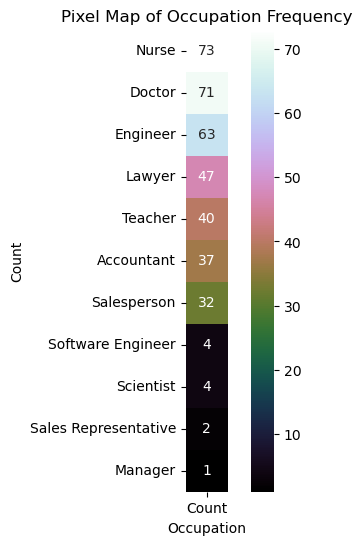

In [39]:
counts = data["Occupation"].value_counts().to_frame(name="Count")

plt.figure(figsize=(6,6))
sns.heatmap(counts, cmap="cubehelix", annot=True, square=True)
plt.title("Pixel Map of Occupation Frequency")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

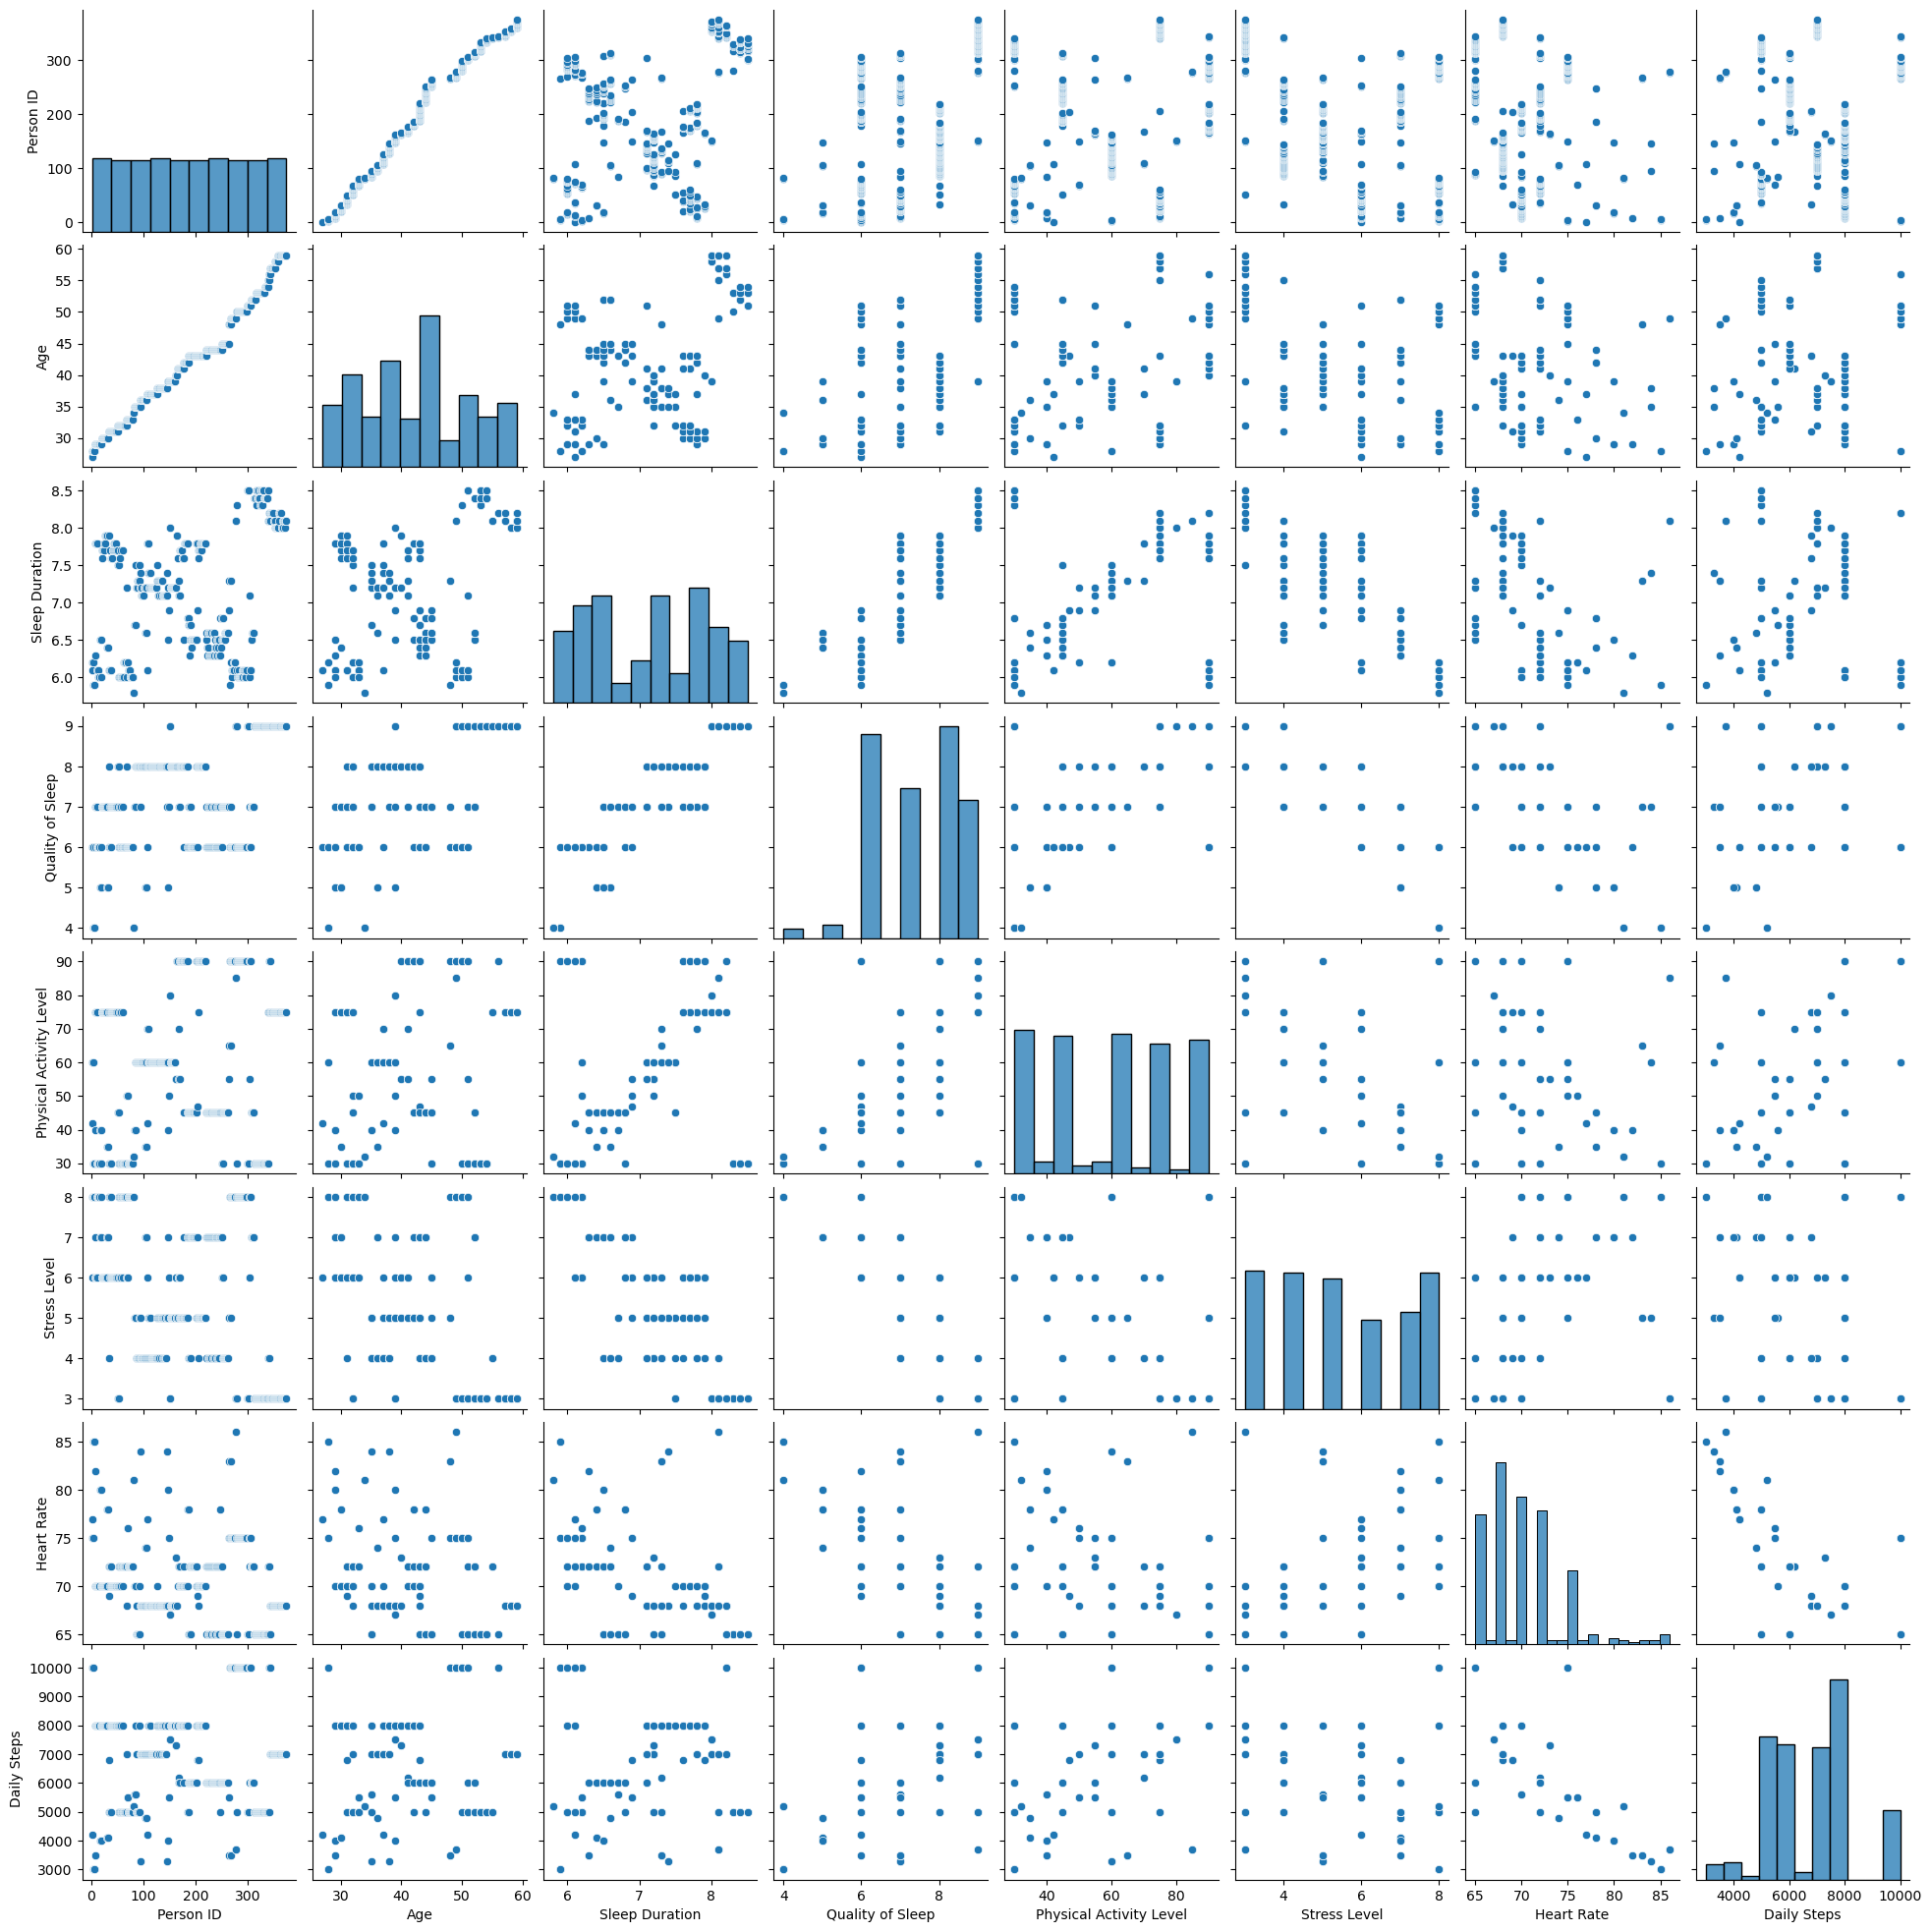

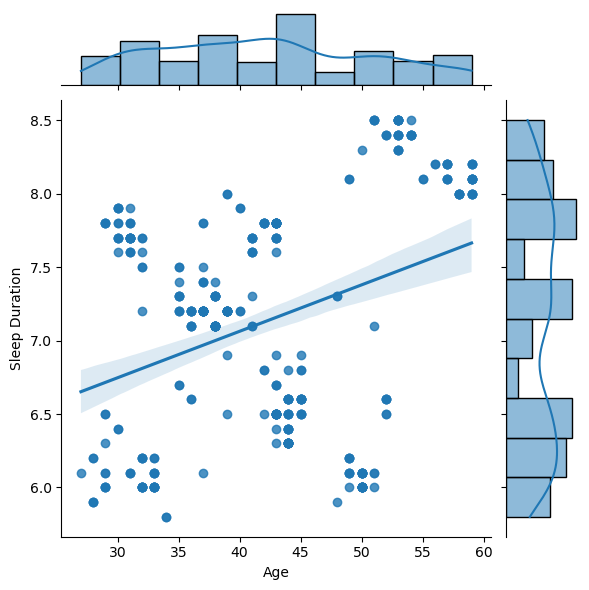

In [31]:
sns.pairplot(data)
plt.show()

sns.jointplot(data=data, x="Age", y="Sleep Duration", kind="reg")
plt.show()